In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import datetime
# FILEPATH: /workspaces/investment-analytics/notebooks/finance/Interest-Rates.ipynb
# RBA monthly lending rates from 1959
csv_file = 'https://www.rba.gov.au/statistics/tables/csv/f5-data.csv'
local_file = '../data/f5-data.csv'
max_age = datetime.timedelta(days=1)
if not os.path.exists(local_file) or datetime.datetime.now() - datetime.datetime.fromtimestamp(os.path.getmtime(local_file)) > max_age:
    import urllib.request
    urllib.request.urlretrieve(csv_file, local_file)

In [3]:
# First 10 rows are descriptive header rows and data is not UTF-8 encoded, use Windows code page 1252 instead
# FILRHLBVS = Financial Interest; Lending rates; Housing loans; Banks; Variable; Standard; Owner-occupier
df = pd.read_csv(local_file, skiprows=10, encoding='cp1252', usecols=['Series ID', 'FILRHLBVS'])
df.dropna(subset=['Series ID'], inplace=True)
df.tail()

,Series ID,FILRHLBVS
774,Jul-2023,8.52
775,Aug-2023,8.52
776,Sep-2023,8.52
777,Oct-2023,8.52
778,Nov-2023,8.77


In [4]:
df.rename(columns={'Series ID': 'Date'}, inplace=True)
# source data is in the format 'Jan-1959' %b-%Y
df['Date'] = pd.to_datetime(df['Date'], format='%b-%Y')


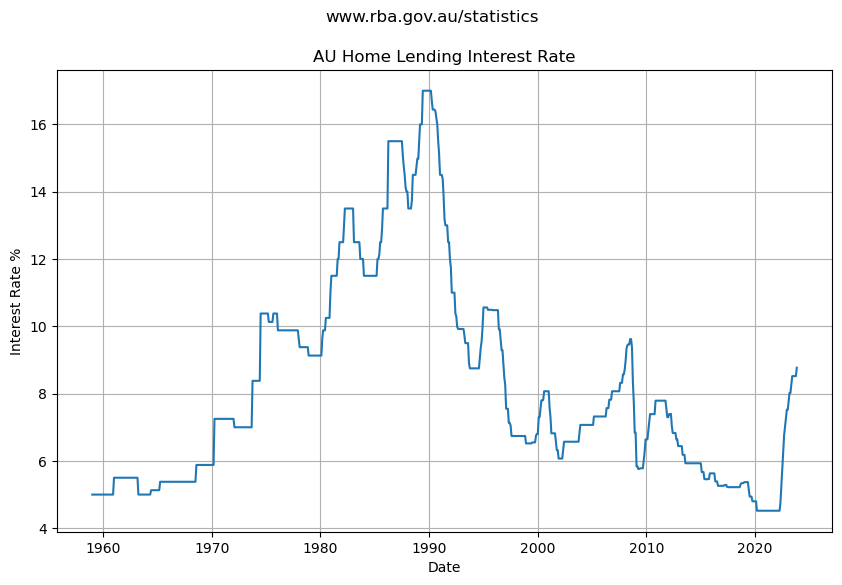

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['FILRHLBVS'])
plt.xlabel('Date')
plt.ylabel('Interest Rate %')
plt.suptitle('www.rba.gov.au/statistics')
plt.title('AU Home Lending Interest Rate')
plt.grid(True)
plt.show()